In [1]:
!which python

/Users/sherryyang/miniconda3/envs/omnipose/bin/python


In [5]:
!conda activate omnipose


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




In [4]:
!conda init zsh

no change     /Users/sherryyang/miniconda3/condabin/conda
no change     /Users/sherryyang/miniconda3/bin/conda
no change     /Users/sherryyang/miniconda3/bin/conda-env
no change     /Users/sherryyang/miniconda3/bin/activate
no change     /Users/sherryyang/miniconda3/bin/deactivate
no change     /Users/sherryyang/miniconda3/etc/profile.d/conda.sh
no change     /Users/sherryyang/miniconda3/etc/fish/conf.d/conda.fish
no change     /Users/sherryyang/miniconda3/shell/condabin/Conda.psm1
no change     /Users/sherryyang/miniconda3/shell/condabin/conda-hook.ps1
no change     /Users/sherryyang/miniconda3/lib/python3.10/site-packages/xontrib/conda.xsh
no change     /Users/sherryyang/miniconda3/etc/profile.d/conda.csh
no change     /Users/sherryyang/.zshrc
No action taken.


In [1]:
import numpy as np
dat = np.load('211121_37C_10_1176_HU_timelapse002_prob211203_HU_t00001xy0c1_seg.npy', allow_pickle=True).item()

In [2]:
import scipy.io
mat = scipy.io.loadmat('regs_label.mat')

In [3]:
import numpy as np
dat = np.load('211121_37C_10_1176_HU_timelapse002_prob211203_HU_t00001xy0c1_seg.npy', allow_pickle=True).item()
gradients = np.gradient(dat['flows'][-1][0])
gradientsy = np.gradient(dat['flows'][-1][1])
gradient_total = gradientsy[1] + gradients[0]

In [4]:
masked_array = gradient_total < -1

In [5]:
regs_label = mat['regs'][0][0][0]

In [83]:
DIGIT = 100000

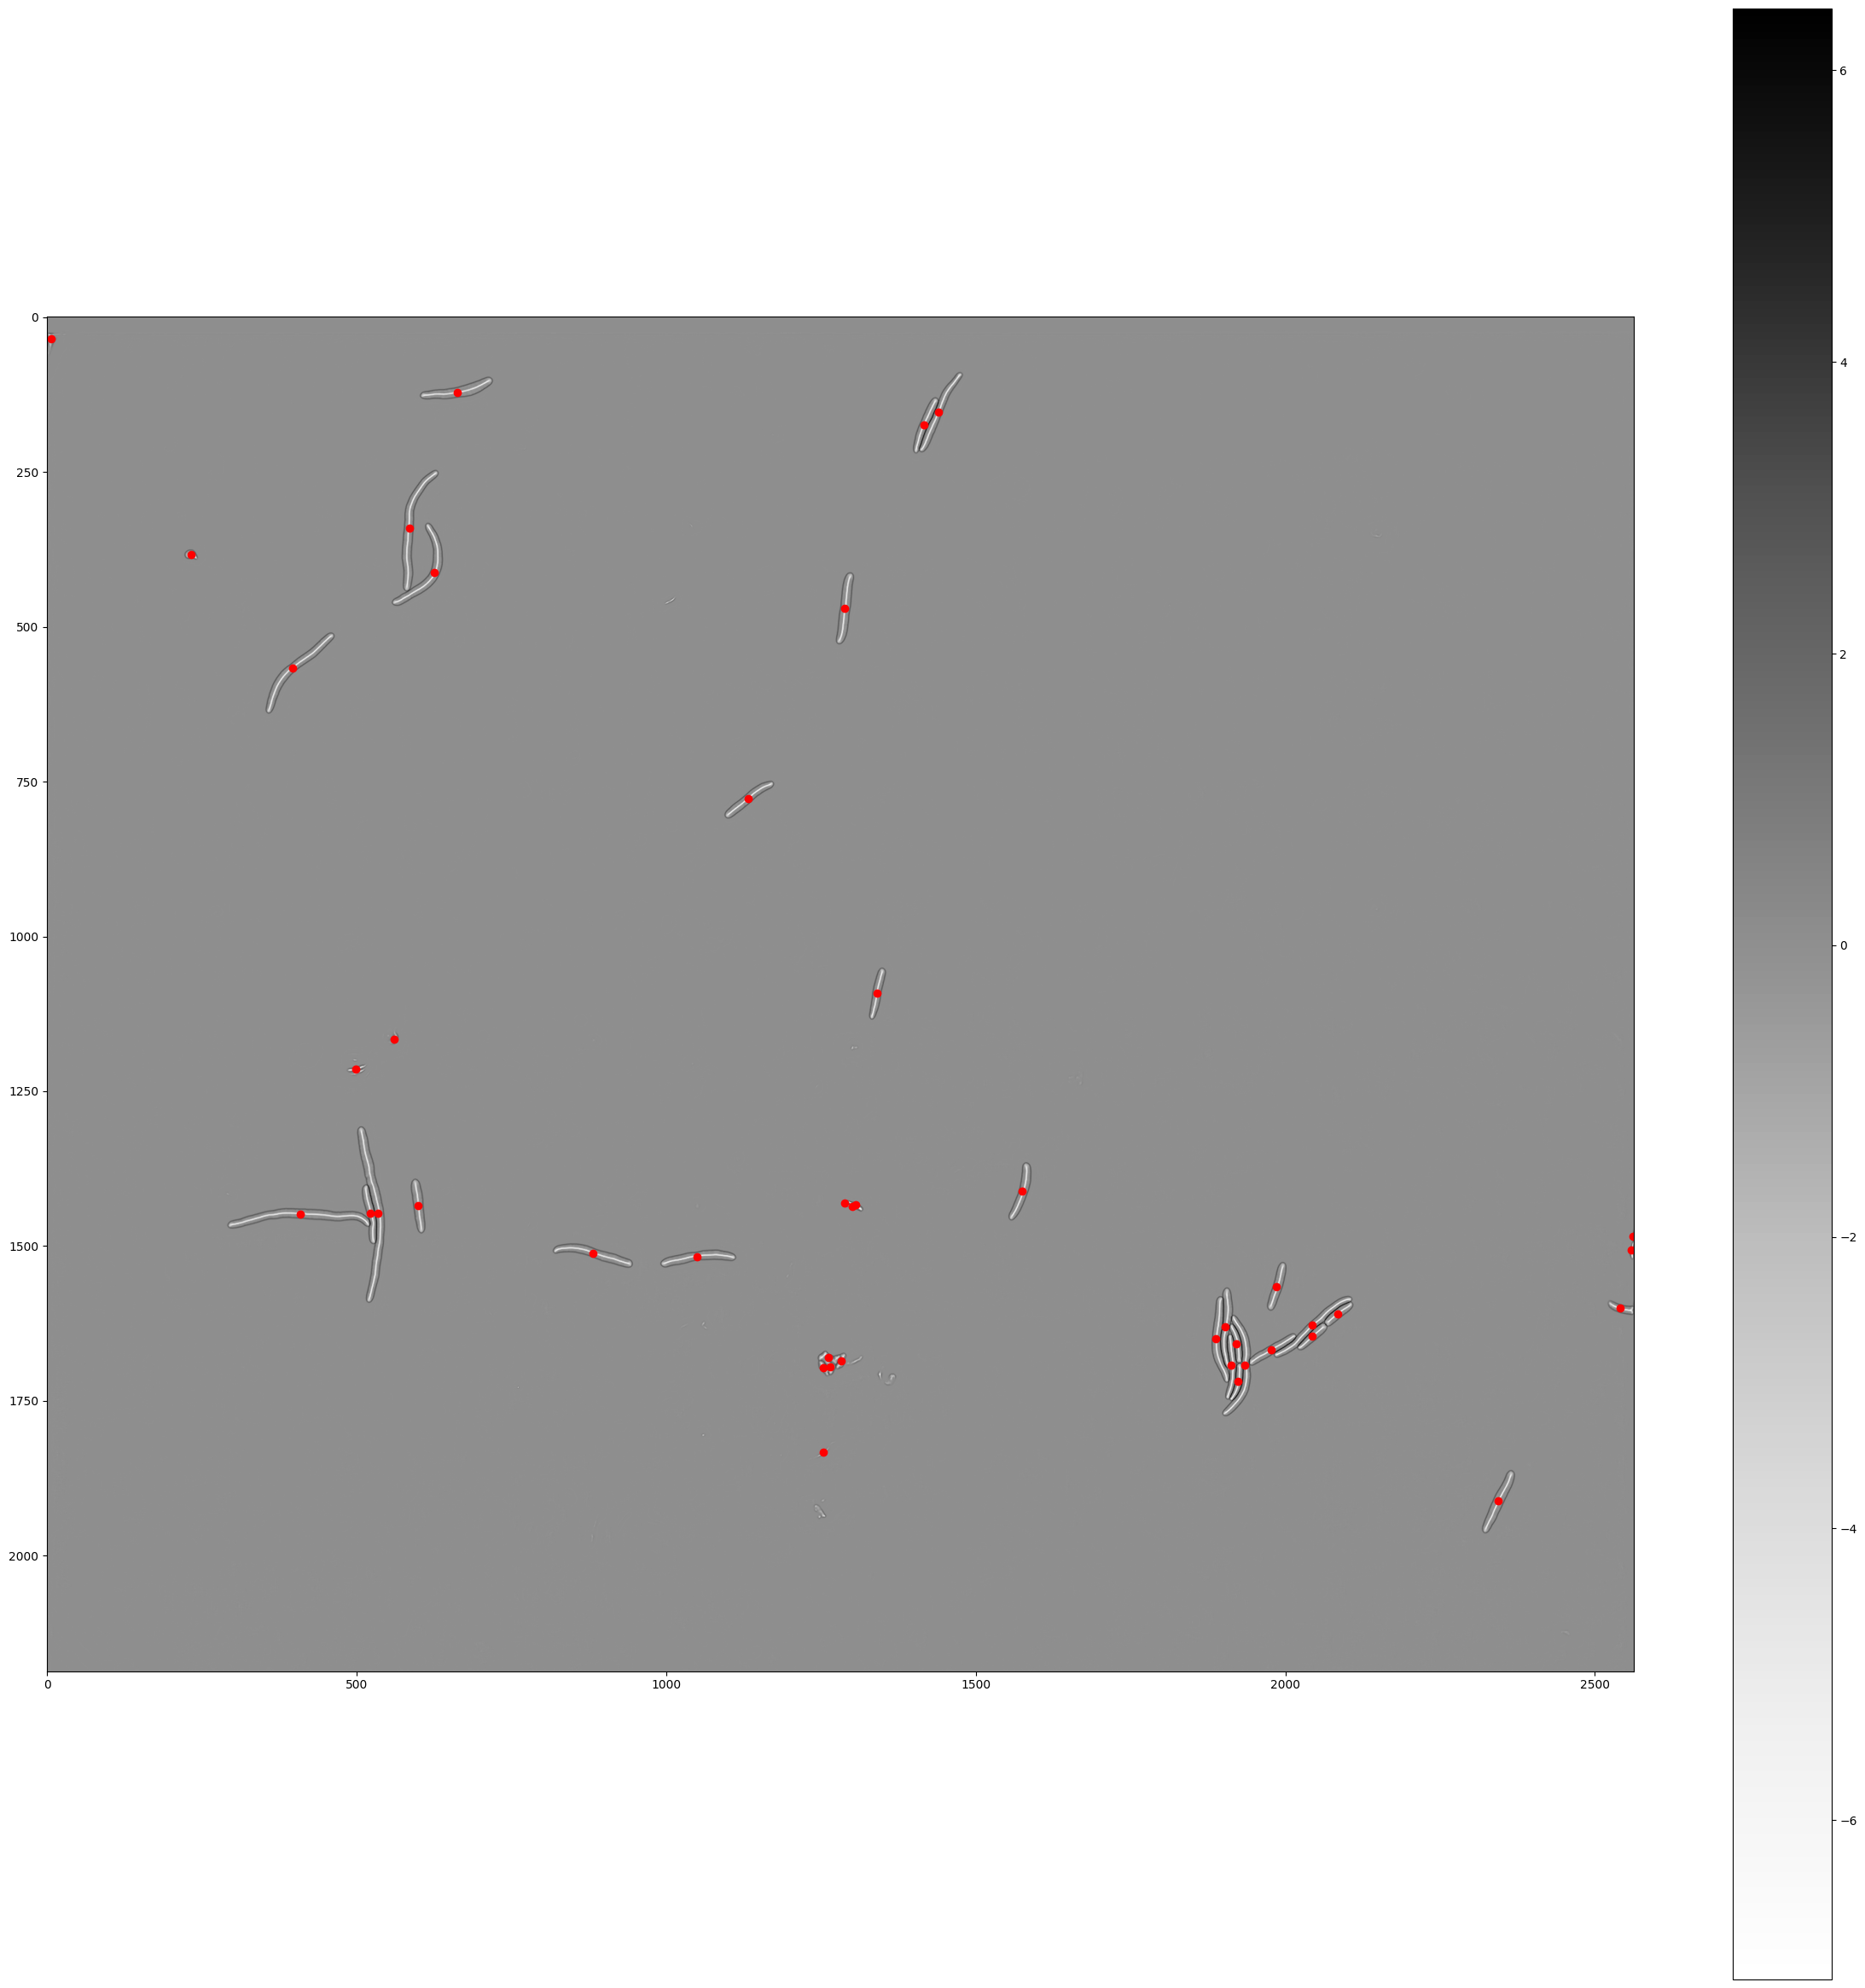

In [103]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30, 30))
image = plt.imshow(gradient_total, cmap='Greys')
centers = []
for i in range(43):
    masked = (regs_label == i) & (gradient_total < -1)
    y = np.ma.array(gradient_total * masked)
    row_indices, col_indices = np.where(y < 0)
    x_center = np.mean(row_indices)
    y_center = np.mean(col_indices)
    distances = np.sqrt((row_indices - x_center)**2 + (col_indices - y_center)**2)
    closest_index = np.argmin(distances)
    closest_point = (row_indices[closest_index], col_indices[closest_index])
    plt.scatter(closest_point[1], closest_point[0], c='red', marker='o')
    centers.append(closest_point[0]*DIGIT + closest_point[1])
plt.colorbar(image)
plt.show()

In [16]:
len(masked_array)

2187

In [72]:
DIGIT

2563

In [70]:
len(masked_array[0])

2563

In [18]:
masked_array[2186][2562] # masked_array[y][x]

False

In [29]:
masked_array[2186,2562]

False

In [106]:
len(centers)

43

In [ ]:
end

In [77]:
gradient_total_copy = gradient_total

In [78]:
masked_array = gradient_total_copy < -1

In [107]:

centers_copy = centers.copy()
gradient_total_copy = gradient_total.copy()
masked_array = gradient_total_copy < -4


point_set = (centers_copy)
end_point = []
while point_set:
    newset = set()
    for element in point_set:
        yy = int(element / DIGIT)
        xx = element % DIGIT  
        small_set = set([element -1 , element +1, element - DIGIT +1, element + DIGIT +1, element + DIGIT -1, element - DIGIT -1, element + DIGIT, element - DIGIT])
        flag = False
        for each in small_set:
            y = int(each / DIGIT)
            x = each % DIGIT
            if(x < 0) or (y < 0) or (y >= len(masked_array)) or (x >= len(masked_array[1])):
                continue
            else:
                if (masked_array[y,x] == True ):
                    count += 1
                    newset.add(each)
                    flag = True
        
        if flag == False:
            end_point.append(element)
        masked_array[yy,xx] = False

    for each in newset:
        y = int(each / DIGIT)
        x = each % DIGIT
        masked_array[y,x] = False
        
    point_set = newset

In [34]:
count

9924

In [10]:
1001/2

500.5

In [108]:
len(end_point)

143

In [67]:
len(centers)

42

In [77]:
len(set(end_point))

439500

In [61]:
end_point_set = set(end_point)

In [93]:
end_point_set.difference(centers)

{280002,
 280003,
 300006,
 340008,
 350005,
 350008,
 360008,
 480005,
 921473,
 921474,
 921475,
 931471,
 1010716,
 1020716,
 1030716,
 1040716,
 1230661,
 1230662,
 1240606,
 1270604,
 1290605,
 1331432,
 1331433,
 1331434,
 1331435,
 1531438,
 1551437,
 1751414,
 2131410,
 2161410,
 2161411,
 2161412,
 2181402,
 2181403,
 2510629,
 2520629,
 2530629,
 2540629,
 2570619,
 2600615,
 3350614,
 3360616,
 3400583,
 3410583,
 3420583,
 3790233,
 3790234,
 3790235,
 3800228,
 3800230,
 3800231,
 3810237,
 3820225,
 3830225,
 3830238,
 3840225,
 3850225,
 3860225,
 3860232,
 3870230,
 3870235,
 3880228,
 3880237,
 3890239,
 3890240,
 3890241,
 4100628,
 4110628,
 4130627,
 4161295,
 4161296,
 4161297,
 4161298,
 4310614,
 4360608,
 4380605,
 4400579,
 4400580,
 4400581,
 4400582,
 4600559,
 4610559,
 4620559,
 4701289,
 5130461,
 5140461,
 5150461,
 5160461,
 5230451,
 5251280,
 5261278,
 5570406,
 5610401,
 5650396,
 5790381,
 5830378,
 6370359,
 6380357,
 7531171,
 7551170,
 7561170,
 7

In [63]:
len(end_point_set)

397

In [ ]:
end_point.

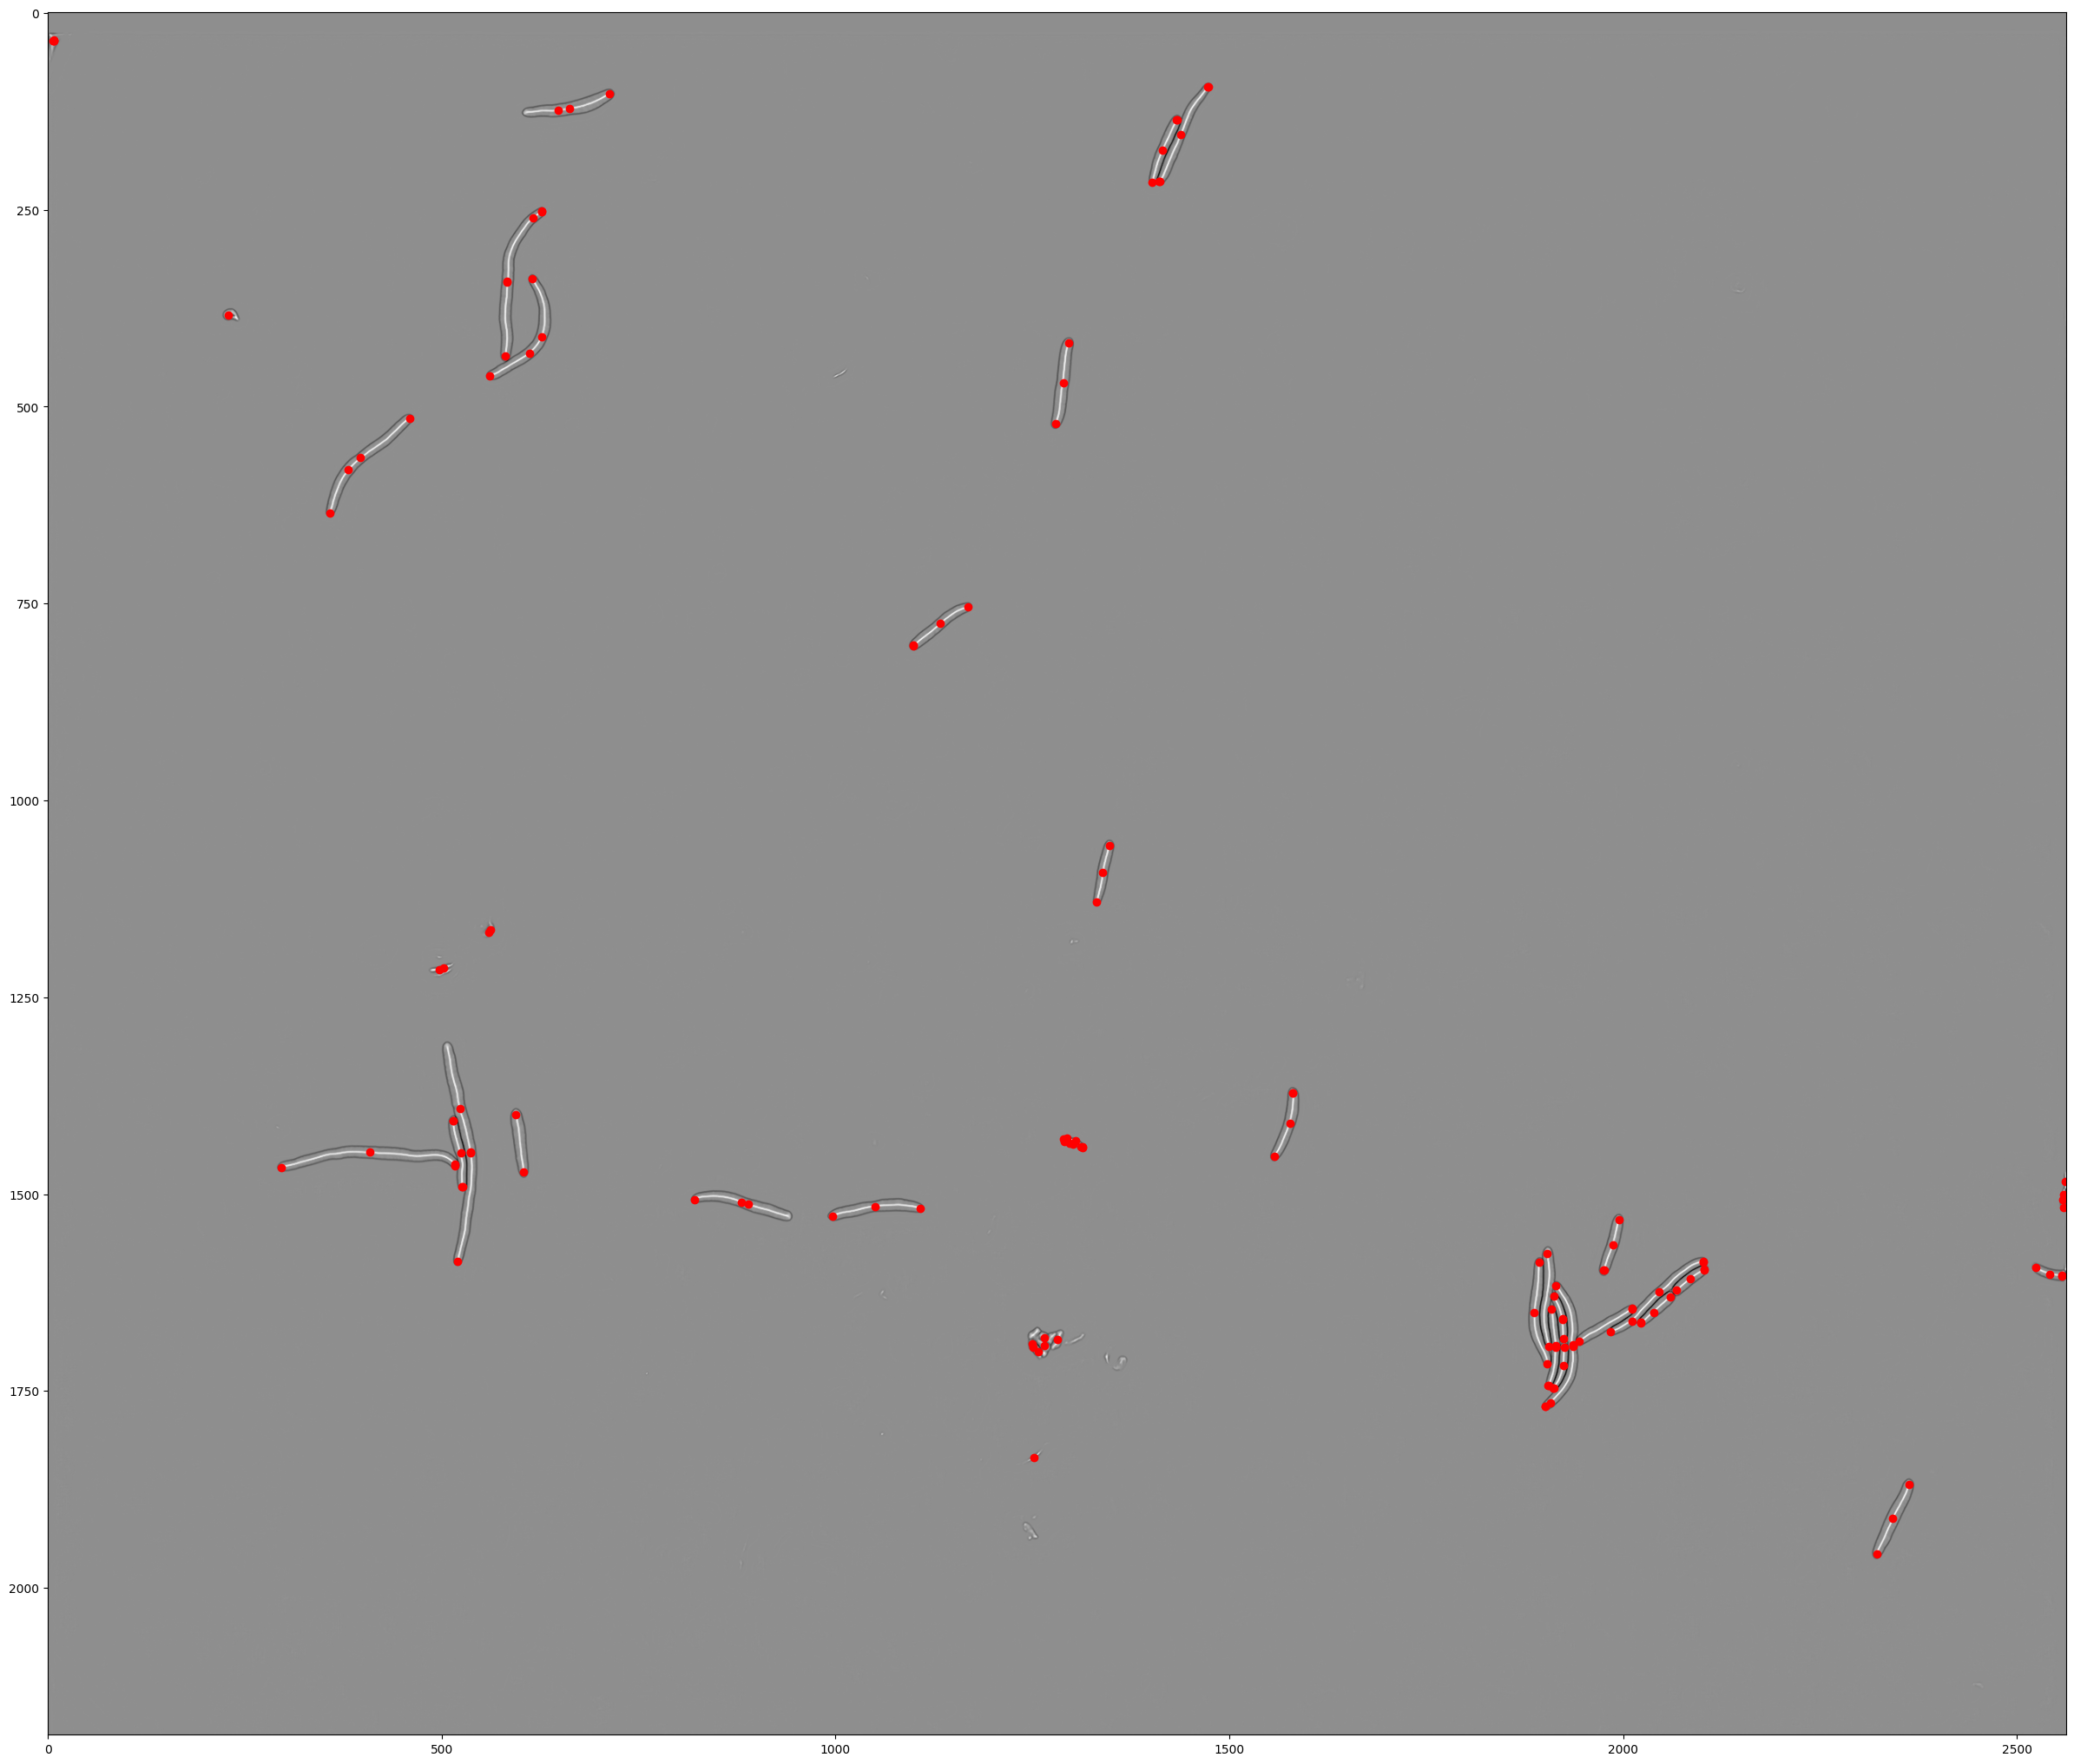

In [109]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30, 30))
image = plt.imshow(gradient_total, cmap='Greys')
centers = []
for each in end_point:
    y = int(each / DIGIT)
    x = each % DIGIT
    plt.scatter(x, y, c='red', marker='o')
plt.show()

In [14]:
for each in end_point:
    y = int(each / DIGIT)
    x = each % DIGIT
    print(masked_array[y,x])

IndexError: index 2563 is out of bounds for axis 1 with size 2563

NameError: name 'gradient_total_copy' is not defined

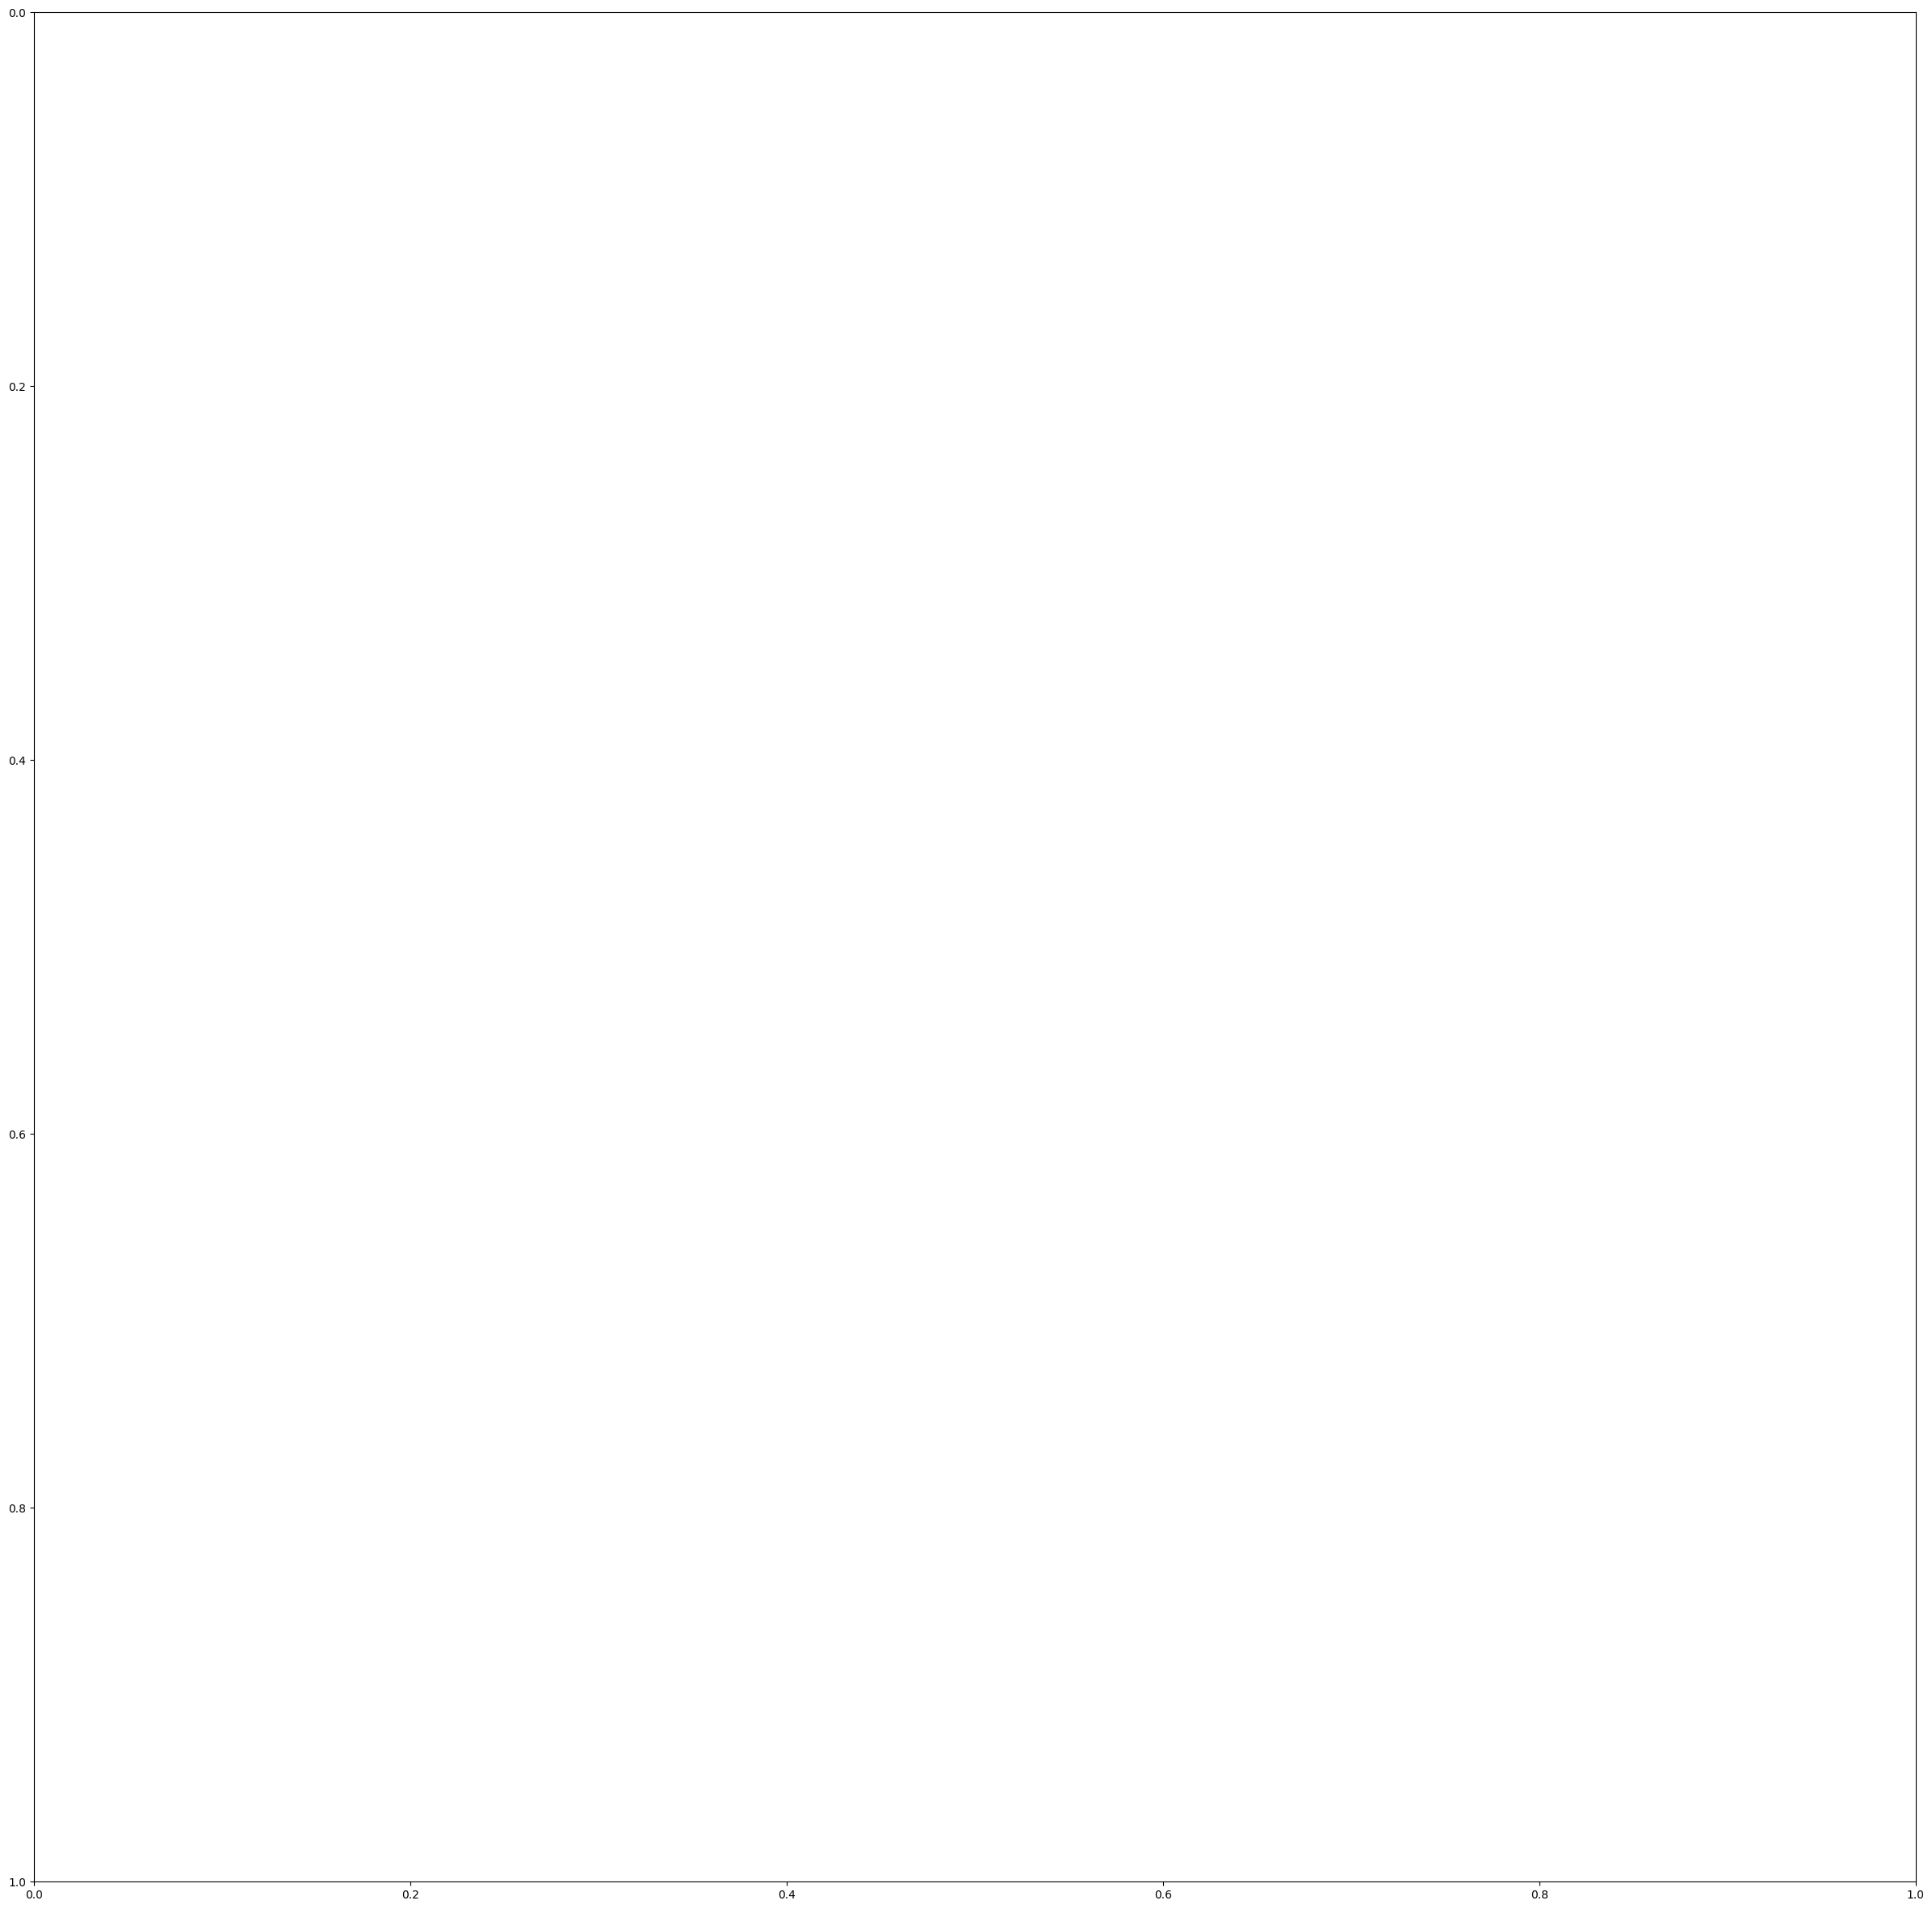

In [1]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30, 30))
image = plt.imshow((gradient_total_copy < -4), cmap='Greys')

In [53]:
masked_array

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [112]:
import matplotlib.pyplot as plt
result = []
for i in range(42):
    masked = (regs_label == i) & (gradient_total < -1)
    y = np.ma.array(gradient_total * masked)
    current_result = -1
    for i in end_point:
        y = int(i / DIGIT)
        x = i % DIGIT
        if(masked[y,x] == True):
            current_result = i
    result.append(current_result)

In [39]:
len(result)

42

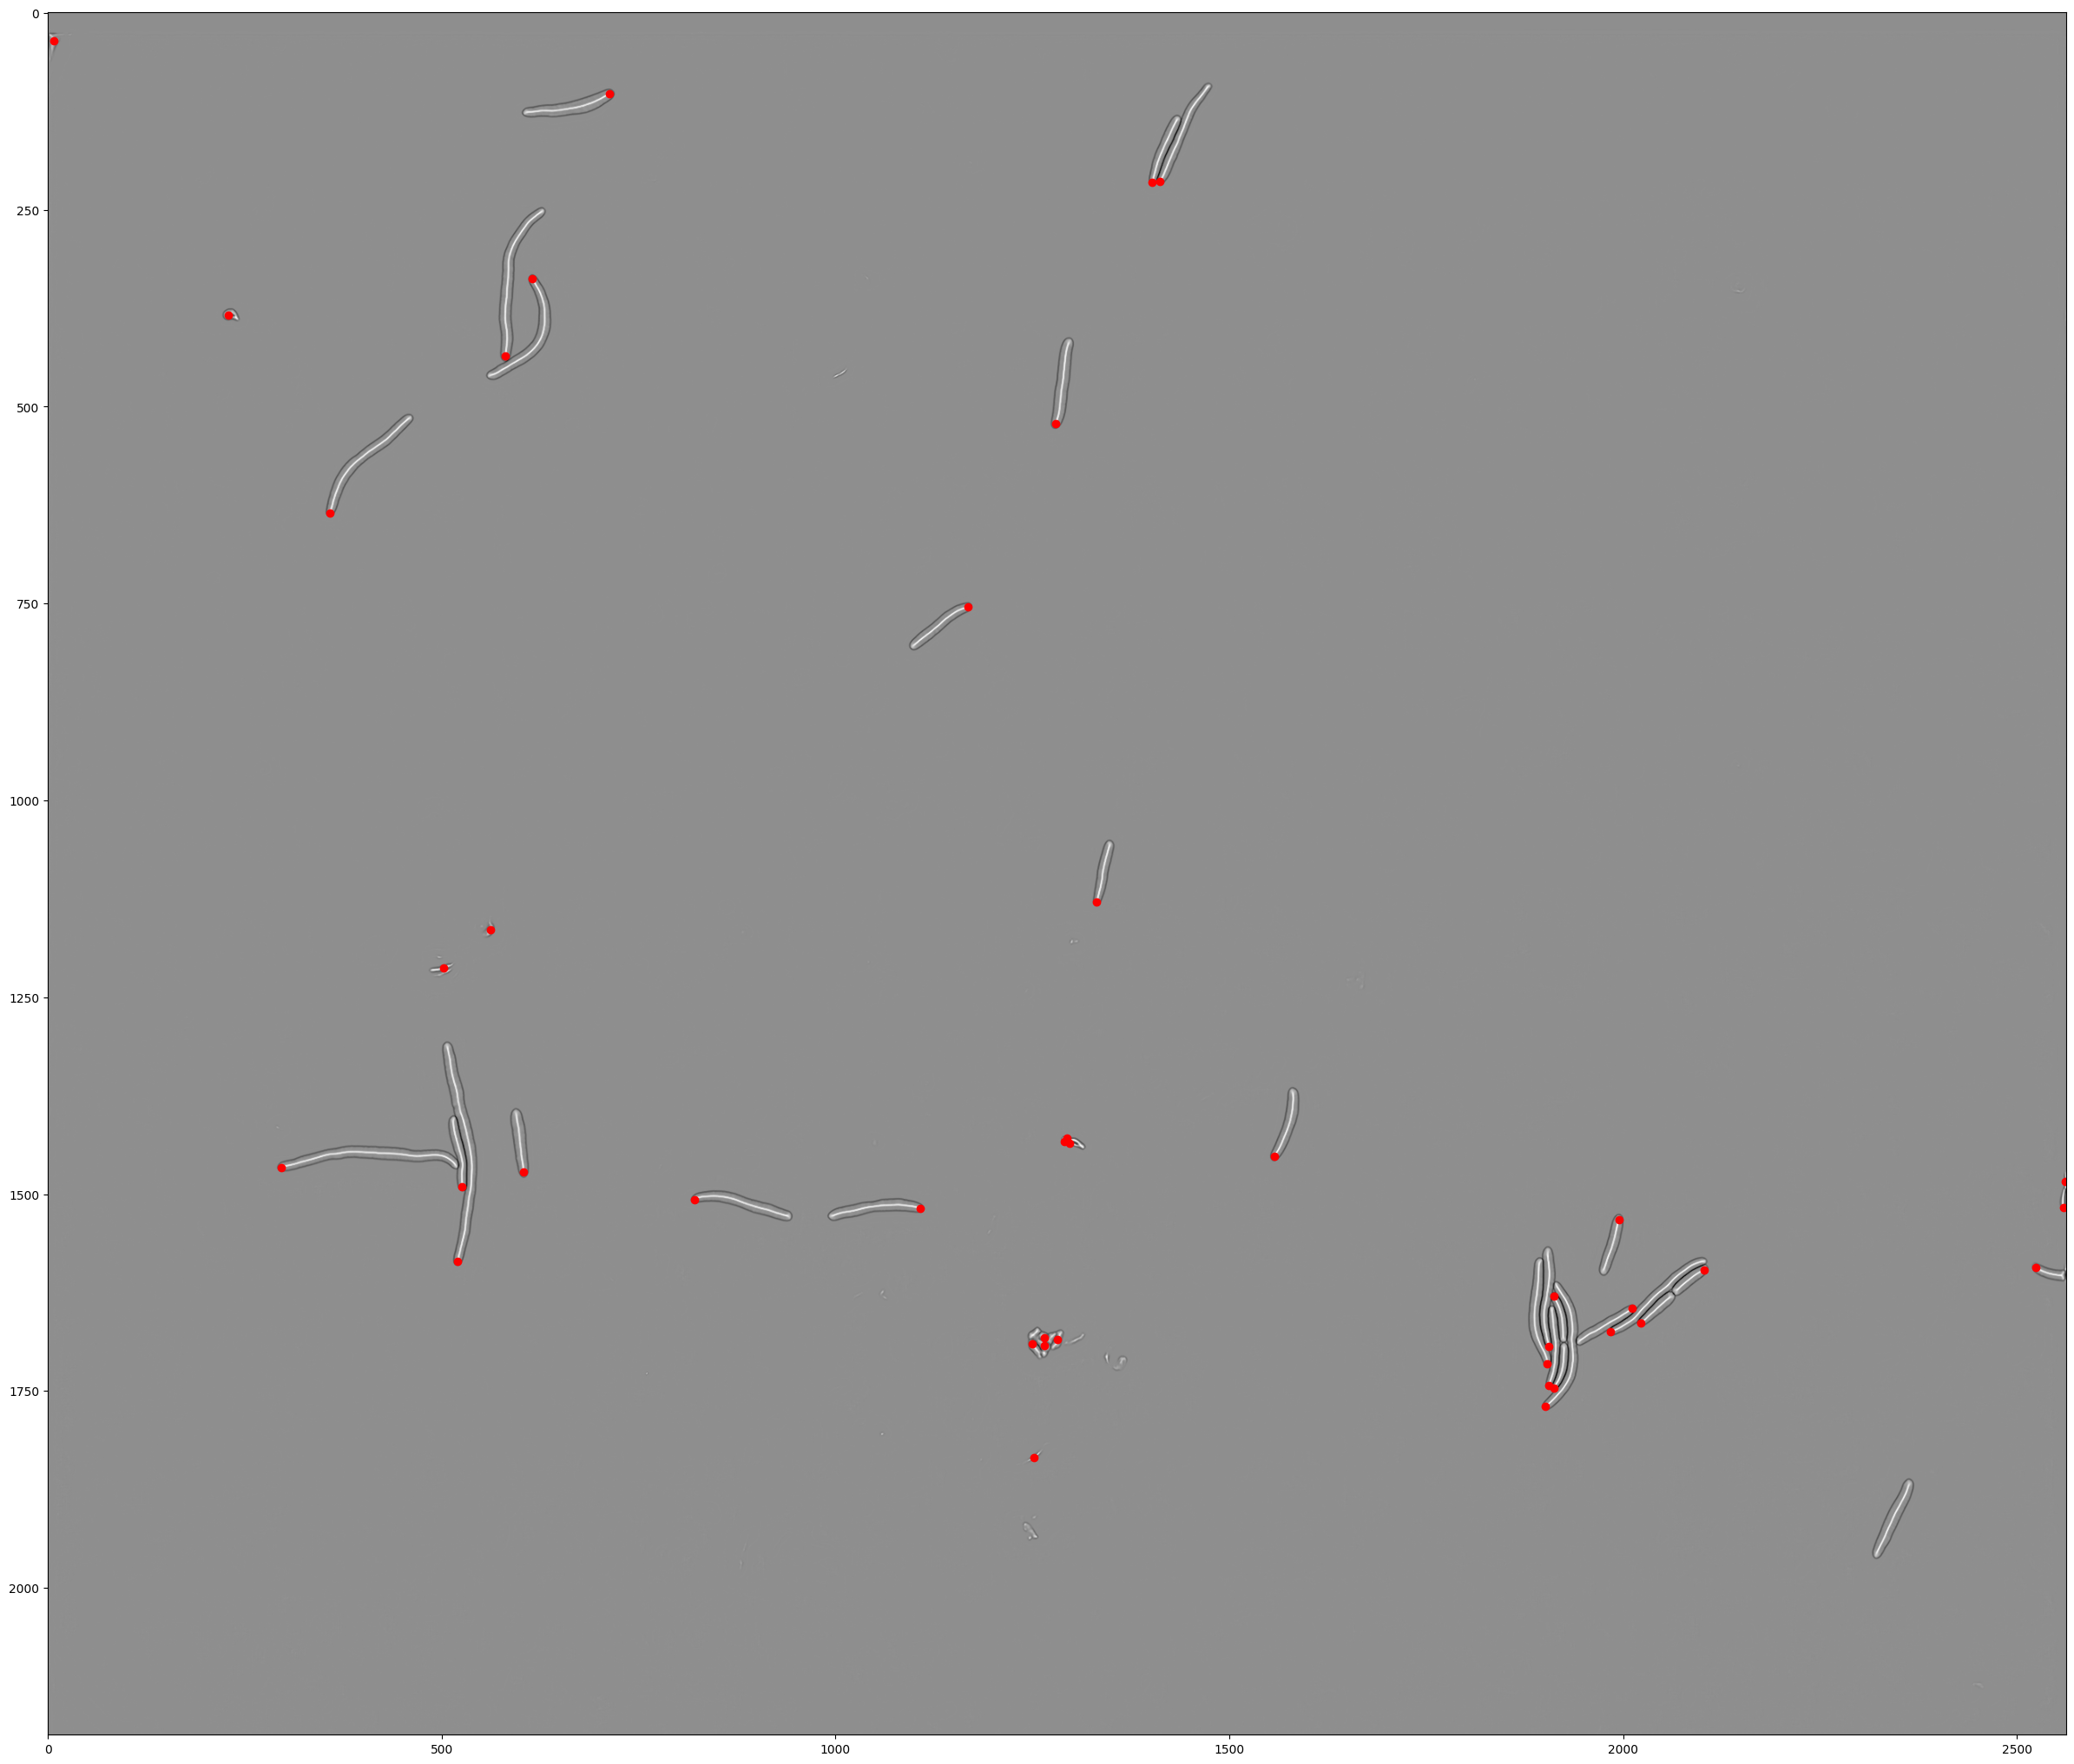

In [113]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30, 30))
image = plt.imshow(gradient_total, cmap='Greys')
centers = []
for each in result:
    y = int(each / DIGIT)
    x = each % DIGIT
    plt.scatter(x, y, c='red', marker='o')
plt.show()

In [42]:
masked_array = gradient_total_copy < -1

In [45]:
sum(sum(masked_array))

10539

In [ ]:

centers_copy = centers.copy()
gradient_total_copy = gradient_total.copy()
masked_array = gradient_total_copy < -4


point_set = (centers_copy)
end_point = []
while point_set:
    newset = set()
    for element in point_set:
        yy = int(element / DIGIT)
        xx = element % DIGIT  
        small_set = set([element -1 , element +1, element - DIGIT +1, element + DIGIT +1, element + DIGIT -1, element - DIGIT -1, element + DIGIT, element - DIGIT])
        flag = False
        for each in small_set:
            y = int(each / DIGIT)
            x = each % DIGIT
            if(x < 0) or (y < 0) or (y >= len(masked_array)) or (x >= len(masked_array[1])):
                continue
            else:
                if (masked_array[y,x] == True ):
                    count += 1
                    newset.add(each)
                    flag = True
        
        if flag == False:
            end_point.append(element)
        masked_array[yy,xx] = False

    for each in newset:
        y = int(each / DIGIT)
        x = each % DIGIT
        masked_array[y,x] = False
        
    point_set = newset